In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Submit request and format output
response_data = requests.get(btc_url).json()

# Fetch current BTC price
my_btc_value = response_data['data']['1']['quotes']['USD']['price']


# Submit request and format output
response_data = requests.get(eth_url).json()

# Fetch current ETH price 
my_eth_value = response_data['data']['1027']['quotes']['USD']['price']


# Compute current value of my crpto
eth_value = my_eth * my_eth_value
btc_value = my_btc * my_btc_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $35689.20
The current value of your 5.3 ETH is $10008.25


In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [24]:
# Format current date as ISO format
start = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end = pd.Timestamp("2021-09-10", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_investments = api.get_bars(
    tickers,
    timeframe,
    start = start,
    
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_investments[df_investments['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_investments[df_investments['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_investments = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_investments.head()


AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.73  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.64  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.05  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.75  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.59   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.15   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.34   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.70   75250412      422688  287.989956

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_investments["AGG"]["close"][0]) 
spy_close_price = float(df_investments["SPY"]["close"][0])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.87
Current SPY closing price: $282.83


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14141.50
The current value of your 200 AGG shares is $23374.00


In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto = eth_value + btc_value
shares = my_agg_value + my_spy_value

amount_data = {
    "amount":[crypto,shares]
}

index_data = ["crypto", "shares"]

# Create savings DataFrame
df_savings = pd.DataFrame(amount_data, index=index_data)


# Display savings DataFrame
display(df_savings)

,amount
crypto,45697.455
shares,37515.500


<Axes: title={'center': 'Portfolio Composition'}, ylabel='amount'>

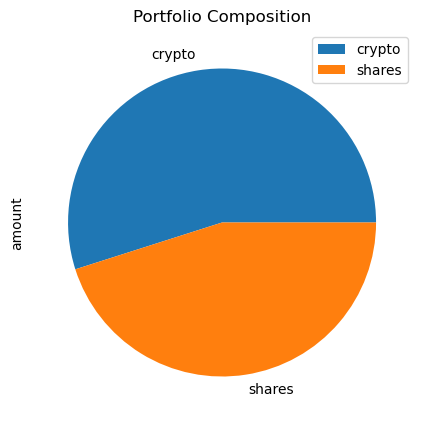

In [29]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings", figsize=(5,5))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3


# Calculate total amount of savings
total_savings = float(df_savings.sum())

# Validate saving health

goal_value = emergency_fund - total_savings

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")

elif total_savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")

else:
    print(f"You are {goal_value} dollars away from reaching your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [31]:
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start = start,
    
).df

# Reorganize the DataFrame
# Separate ticker data
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24394  116.846121  285.31  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.73  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15146  116.879640  286.64  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.05  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15963  116.641826  287.75  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.83  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.59   80882213      460681  281.765334  
2020-05-05 04:00:00+00:00  286.15   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.34   73632628      436219  286.096273  
2020-05-07 04:00:00+00:00  287.70   75250412      422688  287.989956

In [16]:
# Set number of simulations
num_sims = 100

# Configure a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Daily = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data

MC_Daily.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099551   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4611519   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3786651   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-05-01 04:00:00+00:00       24394  116.846121          NaN  285.31   
2020-05-04 04:00:00+00:00       15545  116.960599     0.000856  280.73   
2020-05-05 04:00:00+00:00       15146  116.879640    -0.000769  286.64   
2020-05-06 04:00:00+00:00       20233  116.426742    -0.004021  288.05   
2020-05-07 04:00:00+00:00       15963  116.641826     0.003093  287.75   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2020-05-01 04:00:00+00:00  290.6572  281.5200  282.83  125180028      639987   
2020-05-04 04:00:00+00:00  283.9000  279.1300  283.59   80882213      460681   
2020-05-05 04:00:00+00:00  289.2500  283.7134  286.15   79569939      459764   
2020-05-06 04:00:00+00:00  288.4600  283.7800  284.34   73632628      436219   
2020-05-07 04:00:00+00:00  289.7800  287.1300  287.70   75250412      422688   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-05-01 04:00:00+00:00  284.092832          NaN  
2020-05-04 04:00:00+00:00  281.765334     0.002687  
2020-05-05 04:00:00+00:00  287.400201     0.009027  
2020-05-06 04:00:00+00:00  286.096273    -0.006325  
2020-05-07 04:00:00+00:00  287.989956     0.011817

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_Daily.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992900,0.996805,1.003368,1.007995,1.007135,1.003941,0.996249,1.006535,0.996856,1.006864,...,1.004302,0.994982,1.008828,0.996697,0.996010,1.011654,0.989119,1.002673,0.994714,1.007877
2,0.977586,0.991951,0.993334,1.020402,1.008776,0.998556,0.982403,1.006823,0.989458,0.999186,...,0.999859,1.004928,1.006262,0.997424,0.993564,1.011003,0.989604,0.998352,1.003697,1.019868
3,0.982685,0.993896,1.004117,1.019146,1.014897,1.006239,0.984425,1.007144,0.994183,1.010639,...,0.992496,1.009707,1.006227,1.003917,1.008536,1.015182,0.992766,0.998176,1.006437,1.008814
4,0.988108,1.003712,1.007275,1.022987,1.020098,1.006517,0.982078,1.011188,0.991225,1.006271,...,0.997548,1.006803,0.993362,1.000519,1.007370,1.006613,0.987337,0.992307,1.001037,1.007495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,3.704418,46.033558,8.919263,13.331068,9.798444,3.805206,6.751958,2.631841,8.226047,35.547219,...,12.868281,16.629873,2.103447,4.115979,12.332787,21.236329,6.797914,4.269040,9.874646,16.715137
7557,3.712505,46.582447,8.924519,13.319404,9.794592,3.851906,6.821324,2.635908,8.265895,35.653601,...,12.906331,16.684762,2.110007,4.153538,12.379272,21.346367,6.766261,4.250239,9.789992,16.711341
7558,3.741074,46.349641,8.994663,13.266431,9.760989,3.873840,6.828088,2.620533,8.313199,35.682555,...,12.780893,16.509386,2.091820,4.103909,12.396818,21.496134,6.719213,4.217650,9.827361,16.733726
7559,3.749021,46.150448,8.932859,13.247941,9.790742,3.893000,6.768925,2.642429,8.298103,35.974461,...,12.723857,16.392139,2.117062,4.140770,12.408951,21.281277,6.762320,4.226574,9.863317,16.548635


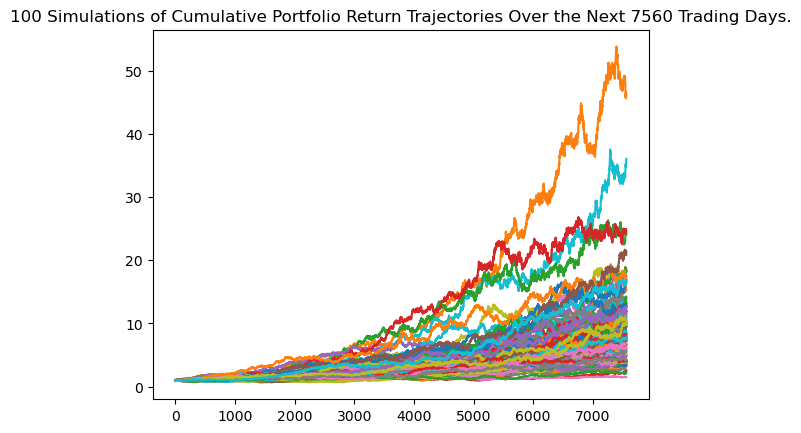

In [19]:
# Plot simulation outcomes
line_plot = MC_Daily.plot_simulation()

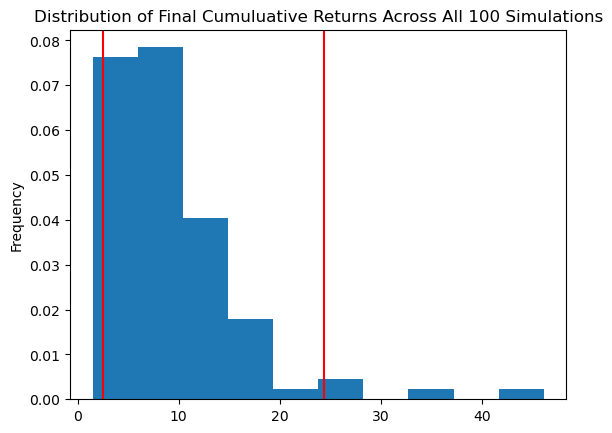

In [20]:
# Plot probability distribution and confidence intervals
dist_plot = MC_Daily.plot_distribution()

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_tbl = MC_Daily.summarize_cumulative_return()

# Print summary statistics
print(sum_tbl)

count           100.000000
mean              9.340244
std               6.668514
min               1.506612
25%               4.788880
50%               7.778006
75%              11.895270
max              46.117722
95% CI Lower      2.541648
95% CI Upper     24.407413
Name: 7560, dtype: float64


In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(sum_tbl[8]*initial_investment,2)
ci_upper = round(sum_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $50832.97 and $488148.26


In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_tbl[8]*initial_investment,2)
ci_upper = round(sum_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $76249.45 and $732222.39
